# Capstone Project - The Battle of Neighborhoods

## Finding Ideal Neighborhood After Relocating to New City

### Introduction

Relocating to a new city and deciding on a neighborhood to live can be challenging, especially if you don't know the new city too well. You may be wondering if you can find a neighborhood that is similar to your current neighborhood. And if you are looking to buy a property, you would be interested in knowing what type of housing would be a better investment in the region. Luckily with the advance in technology, we can rely on information from the internet to aid in this process. 

In this project, we will assume our client will be relocating from **San Francisco, CA to Cincinnati, OH** due to a change in job assignment. The cilent currently lives in **Sunset District** and really enjoys the area -- therefore the client would like to find a similar neighborhood in Cincinnati. The client would also be looking into buying a property and would like to understand if buying a condo or a single family house would be a better option in terms of price growth potential. 

### Data

In order to determine a similar neighborhood in Cincinnati, we will need:
* A list of all neighborhoods in Cincinnati, which can be obtained from https://www.zillow.com/cincinnati-oh/home-values/
* Types of venues in each neighborhood in Cincinnati, which can be obtained using **Foursquare API**
* Types of venues in current neighborhood in Cincinnati, which can be obtained using **Foursquare API**

And to understand what type of housing to buy, we will need:
* housing price trend based on housing type for neighborhoods of interest in Cincinnati, which can be obtained from https://www.zillow.com/research/data/

Once all of the data are downloaded, we can start the data cleaning process. 

In [1]:
import pandas as pd

Importing data files downloaded from the websites:

In [2]:
# The code was removed by Watson Studio for sharing.

Let's first obtain a list of all neighborhoods in Cincinnati. We can filter the housing data to only Cincinati and extract the neighorhood names.

In [3]:
condo.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31
0,274772,0,Northeast Dallas,Neighborhood,TX,TX,Dallas,Dallas-Fort Worth-Arlington,Dallas County,NaN,...,121032.0,122871.0,122745.0,122504.0,122166.0,122644.0,123414.0,124485.0,124859.0,124767.0
1,112345,1,Maryvale,Neighborhood,AZ,AZ,Phoenix,Phoenix-Mesa-Scottsdale,Maricopa County,NaN,...,96994.0,97888.0,98980.0,100184.0,101197.0,102312.0,103437.0,104224.0,104589.0,104948.0
2,192689,2,Paradise,Neighborhood,NV,NV,Las Vegas,Las Vegas-Henderson-Paradise,Clark County,80872.0,...,137853.0,138318.0,138653.0,139089.0,139257.0,139871.0,140382.0,140581.0,140355.0,140437.0
3,270958,3,Upper West Side,Neighborhood,NY,NY,New York,New York-Newark-Jersey City,New York County,281290.0,...,1216487.0,1217569.0,1224463.0,1223837.0,1222385.0,1216017.0,1221558.0,1223896.0,1227676.0,1240187.0
4,118208,4,South Los Angeles,Neighborhood,CA,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,95808.0,...,461995.0,465084.0,468825.0,475578.0,483509.0,490766.0,495757.0,499479.0,503441.0,511399.0


In [4]:
neighborhood = condo[condo['City']=='Cincinnati'].reset_index(drop=True)
neighborhood = neighborhood[['RegionName']]
neighborhood.rename(columns={'RegionName':'Neighborhood'}, inplace=True)
neighborhood

,Neighborhood
0,Westwood
1,West Price HIll
2,CUF
3,Hyde Park
4,College Hill
5,Mt. Washington
6,East Price Hill
7,Forestville
8,Mt. Airy
9,Oakley


Based on this data, there are 30 neighborhoods in Cincinnati. Let's draw them out on a map to ensure that everything is correct. We will use **geopy** to first obtain the latitude and longitude of each neighborhoods and then graph it using **folium**.

In [5]:
from geopy.geocoders import Nominatim

In [6]:
for i, region in zip(neighborhood.index, neighborhood['Neighborhood']):
    toadd = [region, 'Cincinnati, OH']
    address = ', '.join(toadd)
    print(address)
    geolocator = Nominatim(user_agent="cincy_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    neighborhood.loc[i, 'Latitude']=latitude
    neighborhood.loc[i, 'Longitude']=longitude

Westwood, Cincinnati, OH
West Price HIll, Cincinnati, OH
CUF, Cincinnati, OH
Hyde Park, Cincinnati, OH
College Hill, Cincinnati, OH
Mt. Washington, Cincinnati, OH
East Price Hill, Cincinnati, OH
Forestville, Cincinnati, OH
Mt. Airy, Cincinnati, OH
Oakley, Cincinnati, OH
Evanston, Cincinnati, OH
Northside, Cincinnati, OH
Avondale, Cincinnati, OH
Clifton, Cincinnati, OH
Walnut Hills, Cincinnati, OH
North Avondale, Cincinnati, OH
Bond Hill, Cincinnati, OH
West End, Cincinnati, OH
Mt. Auburn, Cincinnati, OH
Mt. Lookout, Cincinnati, OH
Over-The-Rhine, Cincinnati, OH
Kennedy Heights, Cincinnati, OH
Central Business District, Cincinnati, OH
Corryville, Cincinnati, OH
East End, Cincinnati, OH
Columbia-Tusculum, Cincinnati, OH
Lower Price Hill, Cincinnati, OH
Riverside, Cincinnati, OH
Mt. Adams, Cincinnati, OH
Pendleton, Cincinnati, OH


Let's look at the dataframe to ensure all coordinates were added correctly:

In [7]:
neighborhood

,Neighborhood,Latitude,Longitude
0,Westwood,39.148670,-84.599389
1,West Price HIll,39.113811,-84.591869
2,CUF,39.130350,-84.529351
3,Hyde Park,39.139596,-84.442397
4,College Hill,39.202280,-84.547167
5,Mt. Washington,39.087561,-84.386329
6,East Price Hill,39.110059,-84.563833
7,Forestville,39.074622,-84.342096
8,Mt. Airy,39.191447,-84.570222
9,Oakley,39.153081,-84.430709


Everything looks okay. Now we can start graphing it!

In [8]:
#!pip install folium

In [9]:
import numpy as np

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import folium # map rendering library

In [10]:
# obtain starting point of map, which is Cincinnati
address = 'Cincinnati, OH'

geolocator = Nominatim(user_agent="cincy_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Cincinnati are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Cincinnati are 39.1014537, -84.5124602.


In [11]:
# create map of Cincinnati using latitude and longitude values
map_cincy = folium.Map(location=[latitude, longitude], zoom_start=10)

# add boroughs as markers to map
for lat, lng, region in zip(neighborhood['Latitude'], neighborhood['Longitude'], neighborhood['Neighborhood']):
    label = region
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cincy)  
    
map_cincy

All neighborhoods are indeed within Cincinnati, so we have confirmed the list of neighborhoods is correct. Before we proceed to obtain venue information from Foursquare, let's add the geospatial information for Sunset District to the end of the dataframe.

In [12]:
geolocator = Nominatim(user_agent="cincy_explorer")
location = geolocator.geocode('Sunset District, San Francisco, CA')
#latitude = location.latitude
#longitude = location.longitude
neighborhood.loc[30, 'Neighborhood']= 'Sunset District(SF)'
neighborhood.loc[30, 'Latitude']=location.latitude
neighborhood.loc[30, 'Longitude']=location.longitude

In [13]:
neighborhood

,Neighborhood,Latitude,Longitude
0,Westwood,39.148670,-84.599389
1,West Price HIll,39.113811,-84.591869
2,CUF,39.130350,-84.529351
3,Hyde Park,39.139596,-84.442397
4,College Hill,39.202280,-84.547167
5,Mt. Washington,39.087561,-84.386329
6,East Price Hill,39.110059,-84.563833
7,Forestville,39.074622,-84.342096
8,Mt. Airy,39.191447,-84.570222
9,Oakley,39.153081,-84.430709


We can see that Sunset District shows up on the last row of the dataframe. We now have all the neighborhoods that we want to investigate in one dataframe and we can use Foursquare to obtain nearby venue information.

In [14]:
# The code was removed by Watson Studio for sharing.

In [15]:
# Create a function for getting nearby venues by inputting neighborhood information
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
import requests

In [17]:
#Obtain information for each neighborhood
LIMIT = 100
radius = 500
cincinnati_venues = getNearbyVenues(names=neighborhood['Neighborhood'],
                                   latitudes=neighborhood['Latitude'],
                                   longitudes=neighborhood['Longitude'])

Westwood
West Price HIll
CUF
Hyde Park
College Hill
Mt. Washington
East Price Hill
Forestville
Mt. Airy
Oakley
Evanston
Northside
Avondale
Clifton
Walnut Hills
North Avondale
Bond Hill
West End
Mt. Auburn
Mt. Lookout
Over-The-Rhine
Kennedy Heights
Central Business District
Corryville
East End
Columbia-Tusculum
Lower Price Hill
Riverside
Mt. Adams
Pendleton
Sunset District(SF)


Let's examine the dataframe with venue information:

In [18]:
cincinnati_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Westwood,39.14867,-84.599389,West Side Brewing,39.149515,-84.598915,Brewery
1,Westwood,39.14867,-84.599389,Henke Winery,39.150069,-84.599881,Winery
2,Westwood,39.14867,-84.599389,Hobby Lobby,39.144351,-84.599130,Fabric Shop
3,Westwood,39.14867,-84.599389,Subway,39.151642,-84.600680,Sandwich Place
4,Westwood,39.14867,-84.599389,Broadhope Art Collective,39.148804,-84.598196,Art Gallery


In [19]:
cincinnati_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Avondale,2,2,2,2,2,2
Bond Hill,5,5,5,5,5,5
CUF,4,4,4,4,4,4
Central Business District,83,83,83,83,83,83
Clifton,31,31,31,31,31,31
College Hill,14,14,14,14,14,14
Columbia-Tusculum,25,25,25,25,25,25
Corryville,25,25,25,25,25,25
East End,8,8,8,8,8,8


Now let's examine the data containing historic housing price from all U.S. neighborhoods, downloaded from Zillow. There are two types of housing that we will be reviewing - condo and single family house.

In [20]:
condo.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31
0,274772,0,Northeast Dallas,Neighborhood,TX,TX,Dallas,Dallas-Fort Worth-Arlington,Dallas County,NaN,...,121032.0,122871.0,122745.0,122504.0,122166.0,122644.0,123414.0,124485.0,124859.0,124767.0
1,112345,1,Maryvale,Neighborhood,AZ,AZ,Phoenix,Phoenix-Mesa-Scottsdale,Maricopa County,NaN,...,96994.0,97888.0,98980.0,100184.0,101197.0,102312.0,103437.0,104224.0,104589.0,104948.0
2,192689,2,Paradise,Neighborhood,NV,NV,Las Vegas,Las Vegas-Henderson-Paradise,Clark County,80872.0,...,137853.0,138318.0,138653.0,139089.0,139257.0,139871.0,140382.0,140581.0,140355.0,140437.0
3,270958,3,Upper West Side,Neighborhood,NY,NY,New York,New York-Newark-Jersey City,New York County,281290.0,...,1216487.0,1217569.0,1224463.0,1223837.0,1222385.0,1216017.0,1221558.0,1223896.0,1227676.0,1240187.0
4,118208,4,South Los Angeles,Neighborhood,CA,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,95808.0,...,461995.0,465084.0,468825.0,475578.0,483509.0,490766.0,495757.0,499479.0,503441.0,511399.0


Because this project is only interested in looking at housing opportunities in Cincinnati, we will filter the dataset to Cincinnati only.

In [21]:
condo = condo[condo['City']=='Cincinnati']
condo.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31
334,204284,366,Westwood,Neighborhood,OH,OH,Cincinnati,Cincinnati,Hamilton County,42223.0,...,58149.0,58880.0,59382.0,59924.0,60529.0,61259.0,61719.0,61884.0,62054.0,62187.0
669,275981,759,West Price HIll,Neighborhood,OH,OH,Cincinnati,Cincinnati,Hamilton County,116533.0,...,96745.0,97643.0,98103.0,98531.0,99072.0,99955.0,101169.0,102430.0,103949.0,105627.0
736,273417,839,CUF,Neighborhood,OH,OH,Cincinnati,Cincinnati,Hamilton County,53926.0,...,86969.0,87317.0,87108.0,87094.0,87158.0,87537.0,88373.0,89427.0,90502.0,90714.0
869,201414,995,Hyde Park,Neighborhood,OH,OH,Cincinnati,Cincinnati,Hamilton County,109484.0,...,233164.0,234633.0,235414.0,235768.0,235039.0,235186.0,235966.0,237447.0,238642.0,239997.0
992,200100,1147,College Hill,Neighborhood,OH,OH,Cincinnati,Cincinnati,Hamilton County,70756.0,...,124276.0,124641.0,124673.0,124722.0,124760.0,125311.0,126516.0,128625.0,130709.0,132097.0


We will do the same for the dataset for single family house. First let's check the structure of the dataframe.

In [22]:
sfh.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31
0,274772,0,Northeast Dallas,Neighborhood,TX,TX,Dallas,Dallas-Fort Worth-Arlington,Dallas County,157646.0,...,373045.0,374109.0,373431.0,373170.0,372750.0,372883.0,374234.0,376067.0,378153.0,380582.0
1,112345,1,Maryvale,Neighborhood,AZ,AZ,Phoenix,Phoenix-Mesa-Scottsdale,Maricopa County,NaN,...,189827.0,190873.0,192300.0,194167.0,196070.0,198417.0,201249.0,204028.0,206833.0,209779.0
2,192689,2,Paradise,Neighborhood,NV,NV,Las Vegas,Las Vegas-Henderson-Paradise,Clark County,151146.0,...,296613.0,297588.0,298331.0,299509.0,300467.0,302692.0,304572.0,305765.0,306149.0,307488.0
3,270958,3,Upper West Side,Neighborhood,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,...,3668229.0,3634977.0,3624311.0,3631332.0,3629466.0,3607803.0,3587931.0,3571308.0,3583153.0,3577278.0
4,118208,4,South Los Angeles,Neighborhood,CA,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,NaN,...,515448.0,518341.0,522066.0,526257.0,531599.0,537202.0,541961.0,544744.0,547841.0,553626.0


Then let's filter the dataset:

In [23]:
sfh = sfh[sfh['City']=='Cincinnati']
sfh.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31
355,204284,366,Westwood,Neighborhood,OH,OH,Cincinnati,Cincinnati,Hamilton County,88864.0,...,112246.0,113435.0,114342.0,115188.0,115926.0,117003.0,118480.0,120191.0,122299.0,124126.0
727,275981,759,West Price HIll,Neighborhood,OH,OH,Cincinnati,Cincinnati,Hamilton County,79293.0,...,94124.0,95550.0,96965.0,98051.0,99017.0,100064.0,101204.0,102232.0,103527.0,105002.0
806,273417,839,CUF,Neighborhood,OH,OH,Cincinnati,Cincinnati,Hamilton County,68944.0,...,165752.0,166978.0,167933.0,168773.0,169838.0,171172.0,172947.0,174711.0,176869.0,178726.0
956,201414,995,Hyde Park,Neighborhood,OH,OH,Cincinnati,Cincinnati,Hamilton County,225909.0,...,546189.0,548102.0,548268.0,548694.0,549415.0,551760.0,554385.0,558001.0,561841.0,565625.0
1107,200100,1147,College Hill,Neighborhood,OH,OH,Cincinnati,Cincinnati,Hamilton County,95216.0,...,134879.0,135940.0,136644.0,137483.0,138348.0,139472.0,141007.0,142611.0,144017.0,145063.0


We now have cleaned up all datasets and are ready for further data analysis.

### Data Analysis

Recall that the client would want to move to a neighborhood that is similar to the current neighborhood (Sunset, SF). We will use k-means clustering to cluster all neighborhoods in Cincinnati and Sunset District to determine similar neighborhoods. 

To prepare data for k-means clustering analysis, we will first use one hot coding.

In [24]:
#one hot encoding
venues_onehot = pd.get_dummies(cincinnati_venues[['Venue Category']], prefix="", prefix_sep="")
venues_onehot['Neighborhood'] = cincinnati_venues['Neighborhood']

# move neighborhood column to the first column
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])
venues_onehot = venues_onehot[fixed_columns]

venues_onehot.head()

,Neighborhood,ATM,Adult Boutique,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Westwood,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Westwood,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Westwood,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Westwood,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Westwood,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
#group by neighborhood
venues_grouped = venues_onehot.groupby('Neighborhood').mean().reset_index()
venues_grouped.head()

,Neighborhood,ATM,Adult Boutique,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Avondale,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,Bond Hill,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,CUF,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,Central Business District,0.000000,0.012048,0.012048,0.0,0.0,0.0,0.024096,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,Clifton,0.032258,0.000000,0.032258,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.032258,0.0,0.0,0.0,0.032258,0.0,0.0,0.0,0.0,0.0


Now we can use k-means clustering to analyze the neighborhoods.

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
venues_grouped_clustering = venues_grouped.drop('Neighborhood',1)

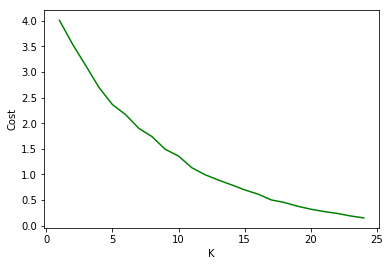

In [28]:
cost = []
for i in range(1,25):
    KM = KMeans(n_clusters = i, random_state=0)
    KM.fit(venues_grouped_clustering)
    cost.append(KM.inertia_)
    
plt.plot(range(1,25), cost, color = 'g')
plt.xlabel("K")
plt.ylabel("Cost")
plt.show()

It's not obvious from the graph where the elbow point is. Let's start with K = 17 where there is a noticable change in cost. 

In [29]:
KM_final = KMeans(n_clusters = 17, random_state=0).fit(venues_grouped_clustering)
venues_grouped.insert(0, 'Cluster Labels', KM_final.labels_)
venues_grouped.head()

,Cluster Labels,Neighborhood,ATM,Adult Boutique,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,2,Avondale,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,8,Bond Hill,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,3,CUF,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0,Central Business District,0.000000,0.012048,0.012048,0.0,0.0,0.0,0.024096,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,5,Clifton,0.032258,0.000000,0.032258,0.0,0.0,0.0,0.000000,0.0,...,0.032258,0.0,0.0,0.0,0.032258,0.0,0.0,0.0,0.0,0.0


In [30]:
venues_grouped[venues_grouped['Neighborhood']=='Sunset District(SF)']

,Cluster Labels,Neighborhood,ATM,Adult Boutique,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
25,0,Sunset District(SF),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.038462,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
venues_interest = venues_grouped[venues_grouped['Cluster Labels'] == 0].reset_index(drop=True)
venues_interest

,Cluster Labels,Neighborhood,ATM,Adult Boutique,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,0,Central Business District,0.000000,0.012048,0.012048,0.00,0.000000,0.000000,0.024096,0.00000,...,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.00
1,0,Columbia-Tusculum,0.000000,0.000000,0.080000,0.04,0.000000,0.000000,0.000000,0.00000,...,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.08
2,0,Mt. Adams,0.000000,0.000000,0.125000,0.00,0.000000,0.000000,0.000000,0.00000,...,0.0,0.000000,0.0,0.000000,0.041667,0.00000,0.0,0.0,0.0,0.00
3,0,Mt. Lookout,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.05000,...,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.00
4,0,Northside,0.000000,0.000000,0.030303,0.00,0.000000,0.030303,0.000000,0.00000,...,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.00
5,0,Oakley,0.000000,0.000000,0.031250,0.00,0.000000,0.062500,0.000000,0.03125,...,0.0,0.000000,0.0,0.000000,0.000000,0.03125,0.0,0.0,0.0,0.00
6,0,Over-The-Rhine,0.012987,0.000000,0.038961,0.00,0.012987,0.012987,0.000000,0.00000,...,0.0,0.012987,0.0,0.000000,0.025974,0.00000,0.0,0.0,0.0,0.00
7,0,Pendleton,0.017544,0.000000,0.035088,0.00,0.017544,0.017544,0.000000,0.00000,...,0.0,0.000000,0.0,0.000000,0.035088,0.00000,0.0,0.0,0.0,0.00
8,0,Sunset District(SF),0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,...,0.0,0.000000,0.0,0.038462,0.000000,0.00000,0.0,0.0,0.0,0.00


In [32]:
# Create function to return most common venues in neighborhood
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [33]:
venues_interest=venues_interest.drop('Cluster Labels',1)
venues_interest

,Neighborhood,ATM,Adult Boutique,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Central Business District,0.000000,0.012048,0.012048,0.00,0.000000,0.000000,0.024096,0.00000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.00
1,Columbia-Tusculum,0.000000,0.000000,0.080000,0.04,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.08
2,Mt. Adams,0.000000,0.000000,0.125000,0.00,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.000000,0.0,0.000000,0.041667,0.00000,0.0,0.0,0.0,0.00
3,Mt. Lookout,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.05000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.00
4,Northside,0.000000,0.000000,0.030303,0.00,0.000000,0.030303,0.000000,0.00000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.00
5,Oakley,0.000000,0.000000,0.031250,0.00,0.000000,0.062500,0.000000,0.03125,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.03125,0.0,0.0,0.0,0.00
6,Over-The-Rhine,0.012987,0.000000,0.038961,0.00,0.012987,0.012987,0.000000,0.00000,0.0,...,0.0,0.012987,0.0,0.000000,0.025974,0.00000,0.0,0.0,0.0,0.00
7,Pendleton,0.017544,0.000000,0.035088,0.00,0.017544,0.017544,0.000000,0.00000,0.0,...,0.0,0.000000,0.0,0.000000,0.035088,0.00000,0.0,0.0,0.0,0.00
8,Sunset District(SF),0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.000000,0.0,0.038462,0.000000,0.00000,0.0,0.0,0.0,0.00


In [34]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Neighborhood'] = venues_interest['Neighborhood']

for ind in np.arange(venues_interest.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_interest.iloc[ind, :], num_top_venues)

venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Central Business District,Sandwich Place,Bar,Hotel,Coffee Shop,Mexican Restaurant
1,Columbia-Tusculum,Bar,Yoga Studio,American Restaurant,Baseball Field,Cajun / Creole Restaurant
2,Mt. Adams,Bar,American Restaurant,Trail,Ice Cream Shop,Bakery
3,Mt. Lookout,Bar,Sushi Restaurant,Pizza Place,Thai Restaurant,Bank
4,Northside,Bar,Dive Bar,Coffee Shop,Bakery,Brewery
5,Oakley,Furniture / Home Store,Pizza Place,Art Gallery,Bar,Rock Club
6,Over-The-Rhine,Bar,Bakery,American Restaurant,Cocktail Bar,Coffee Shop
7,Pendleton,Bar,Coffee Shop,Bakery,American Restaurant,Sports Bar
8,Sunset District(SF),Chinese Restaurant,Bubble Tea Shop,Dim Sum Restaurant,Bakery,Middle School


Now let's start examining the housing price data in the selected neighborhoods.

The client would like to invest in a property in a region where there is high potential for growth. Let's analyze the housing price trend in Cincinnati.

In [35]:
condo.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31
334,204284,366,Westwood,Neighborhood,OH,OH,Cincinnati,Cincinnati,Hamilton County,42223.0,...,58149.0,58880.0,59382.0,59924.0,60529.0,61259.0,61719.0,61884.0,62054.0,62187.0
669,275981,759,West Price HIll,Neighborhood,OH,OH,Cincinnati,Cincinnati,Hamilton County,116533.0,...,96745.0,97643.0,98103.0,98531.0,99072.0,99955.0,101169.0,102430.0,103949.0,105627.0
736,273417,839,CUF,Neighborhood,OH,OH,Cincinnati,Cincinnati,Hamilton County,53926.0,...,86969.0,87317.0,87108.0,87094.0,87158.0,87537.0,88373.0,89427.0,90502.0,90714.0
869,201414,995,Hyde Park,Neighborhood,OH,OH,Cincinnati,Cincinnati,Hamilton County,109484.0,...,233164.0,234633.0,235414.0,235768.0,235039.0,235186.0,235966.0,237447.0,238642.0,239997.0
992,200100,1147,College Hill,Neighborhood,OH,OH,Cincinnati,Cincinnati,Hamilton County,70756.0,...,124276.0,124641.0,124673.0,124722.0,124760.0,125311.0,126516.0,128625.0,130709.0,132097.0


Let's drop all unnecessary columns in the dataset and restructure the dataset so it is indexed by neighborhoods.

In [36]:
condo.drop(['RegionID','SizeRank','RegionType','StateName','State','City', 'Metro','CountyName'],axis=1, inplace=True)
condo.head()

,RegionName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,...,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31
334,Westwood,42223.0,41625.0,41136.0,40155.0,39550.0,39150.0,38977.0,38796.0,38671.0,...,58149.0,58880.0,59382.0,59924.0,60529.0,61259.0,61719.0,61884.0,62054.0,62187.0
669,West Price HIll,116533.0,115822.0,114872.0,113511.0,112725.0,112265.0,111709.0,111179.0,110908.0,...,96745.0,97643.0,98103.0,98531.0,99072.0,99955.0,101169.0,102430.0,103949.0,105627.0
736,CUF,53926.0,54078.0,54880.0,55601.0,56148.0,56520.0,57314.0,58377.0,58700.0,...,86969.0,87317.0,87108.0,87094.0,87158.0,87537.0,88373.0,89427.0,90502.0,90714.0
869,Hyde Park,109484.0,109833.0,109544.0,110207.0,111115.0,112556.0,113191.0,113545.0,114462.0,...,233164.0,234633.0,235414.0,235768.0,235039.0,235186.0,235966.0,237447.0,238642.0,239997.0
992,College Hill,70756.0,70769.0,70796.0,71192.0,71879.0,72598.0,72903.0,72881.0,73261.0,...,124276.0,124641.0,124673.0,124722.0,124760.0,125311.0,126516.0,128625.0,130709.0,132097.0


In [37]:
# Change index to neighborhood
condo.set_index('RegionName',inplace=True)
condo.index.name = None
condo.head()

,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,...,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31
Westwood,42223.0,41625.0,41136.0,40155.0,39550.0,39150.0,38977.0,38796.0,38671.0,38633.0,...,58149.0,58880.0,59382.0,59924.0,60529.0,61259.0,61719.0,61884.0,62054.0,62187.0
West Price HIll,116533.0,115822.0,114872.0,113511.0,112725.0,112265.0,111709.0,111179.0,110908.0,110801.0,...,96745.0,97643.0,98103.0,98531.0,99072.0,99955.0,101169.0,102430.0,103949.0,105627.0
CUF,53926.0,54078.0,54880.0,55601.0,56148.0,56520.0,57314.0,58377.0,58700.0,58931.0,...,86969.0,87317.0,87108.0,87094.0,87158.0,87537.0,88373.0,89427.0,90502.0,90714.0
Hyde Park,109484.0,109833.0,109544.0,110207.0,111115.0,112556.0,113191.0,113545.0,114462.0,115105.0,...,233164.0,234633.0,235414.0,235768.0,235039.0,235186.0,235966.0,237447.0,238642.0,239997.0
College Hill,70756.0,70769.0,70796.0,71192.0,71879.0,72598.0,72903.0,72881.0,73261.0,74304.0,...,124276.0,124641.0,124673.0,124722.0,124760.0,125311.0,126516.0,128625.0,130709.0,132097.0


We are only interested in analyzing neighborhoods of interest, so let's filter the housing data to only selected neighborhoods. We will also drop the row with Sunset District as it is not relevant for housing price trend analysis.

In [38]:
neighborhoods =  venues_sorted[['Neighborhood']]
#Drop the row for Sunset District
neighborhoods = neighborhoods.drop(8, 0)
neighborhoods

,Neighborhood
0,Central Business District
1,Columbia-Tusculum
2,Mt. Adams
3,Mt. Lookout
4,Northside
5,Oakley
6,Over-The-Rhine
7,Pendleton


Now let's get the historic house price for these neighborhoods.

In [39]:
condo_interest = neighborhoods.join(condo, on='Neighborhood')
condo_interest.set_index('Neighborhood',inplace=True)
condo_interest.index.name = None
condo_interest

,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,...,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31
Central Business District,183539.0,182991.0,183083.0,183751.0,185062.0,186891.0,188754.0,191442.0,194786.0,197747.0,...,334899.0,335997.0,336302.0,336685.0,336249.0,336033.0,335729.0,336140.0,337338.0,339057.0
Columbia-Tusculum,149819.0,150042.0,150410.0,150986.0,151406.0,152033.0,152480.0,153172.0,153225.0,153169.0,...,273315.0,274570.0,274645.0,274557.0,274168.0,274072.0,274424.0,275560.0,277479.0,279199.0
Mt. Adams,NaN,NaN,NaN,NaN,NaN,154849.0,155804.0,155376.0,156098.0,156354.0,...,305825.0,307843.0,307876.0,307757.0,307936.0,309460.0,311100.0,313327.0,316105.0,319388.0
Mt. Lookout,111141.0,111768.0,112147.0,113225.0,114220.0,115154.0,115870.0,116663.0,117174.0,117159.0,...,258922.0,260135.0,260096.0,259756.0,259279.0,259735.0,260696.0,261872.0,262373.0,263188.0
Northside,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,111949.0,112179.0,112780.0,113444.0,114063.0,114535.0,115057.0,115766.0,116685.0,116295.0
Oakley,194024.0,192940.0,191352.0,189968.0,188998.0,188728.0,189007.0,189801.0,191235.0,191671.0,...,359068.0,362007.0,363237.0,364278.0,365701.0,366603.0,367242.0,368948.0,370919.0,373058.0
Over-The-Rhine,80884.0,81578.0,81604.0,81978.0,82005.0,82508.0,82715.0,82439.0,82353.0,82281.0,...,257459.0,258118.0,258897.0,258760.0,258462.0,258313.0,258912.0,259992.0,261606.0,262767.0
Pendleton,NaN,NaN,NaN,NaN,NaN,64320.0,64530.0,64270.0,63871.0,63022.0,...,298081.0,301028.0,302131.0,301752.0,300152.0,298948.0,298530.0,298292.0,297029.0,293862.0


In [40]:
# Transpose dataset for later analysis
condo_time = condo_interest.transpose()
condo_time.head()

,Central Business District,Columbia-Tusculum,Mt. Adams,Mt. Lookout,Northside,Oakley,Over-The-Rhine,Pendleton
1996-01-31,183539.0,149819.0,NaN,111141.0,NaN,194024.0,80884.0,NaN
1996-02-29,182991.0,150042.0,NaN,111768.0,NaN,192940.0,81578.0,NaN
1996-03-31,183083.0,150410.0,NaN,112147.0,NaN,191352.0,81604.0,NaN
1996-04-30,183751.0,150986.0,NaN,113225.0,NaN,189968.0,81978.0,NaN
1996-05-31,185062.0,151406.0,NaN,114220.0,NaN,188998.0,82005.0,NaN


In [41]:
# Clean up the dataframe
condo_time.reset_index(inplace=True)
condo_time.rename(columns={"index" : "Time"}, inplace=True)

In [42]:
condo_time.dtypes

Time                          object
Central Business District    float64
Columbia-Tusculum            float64
Mt. Adams                    float64
Mt. Lookout                  float64
Northside                    float64
Oakley                       float64
Over-The-Rhine               float64
Pendleton                    float64
dtype: object

In [43]:
# Change datatype for 'Time'
condo_time['Time']=pd.to_datetime(condo_time['Time'])

In [44]:
condo_time.head()

,Time,Central Business District,Columbia-Tusculum,Mt. Adams,Mt. Lookout,Northside,Oakley,Over-The-Rhine,Pendleton
0,1996-01-31,183539.0,149819.0,NaN,111141.0,NaN,194024.0,80884.0,NaN
1,1996-02-29,182991.0,150042.0,NaN,111768.0,NaN,192940.0,81578.0,NaN
2,1996-03-31,183083.0,150410.0,NaN,112147.0,NaN,191352.0,81604.0,NaN
3,1996-04-30,183751.0,150986.0,NaN,113225.0,NaN,189968.0,81978.0,NaN
4,1996-05-31,185062.0,151406.0,NaN,114220.0,NaN,188998.0,82005.0,NaN


Let's plot the house price data for condos.

In [45]:
import matplotlib.pyplot as plt

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


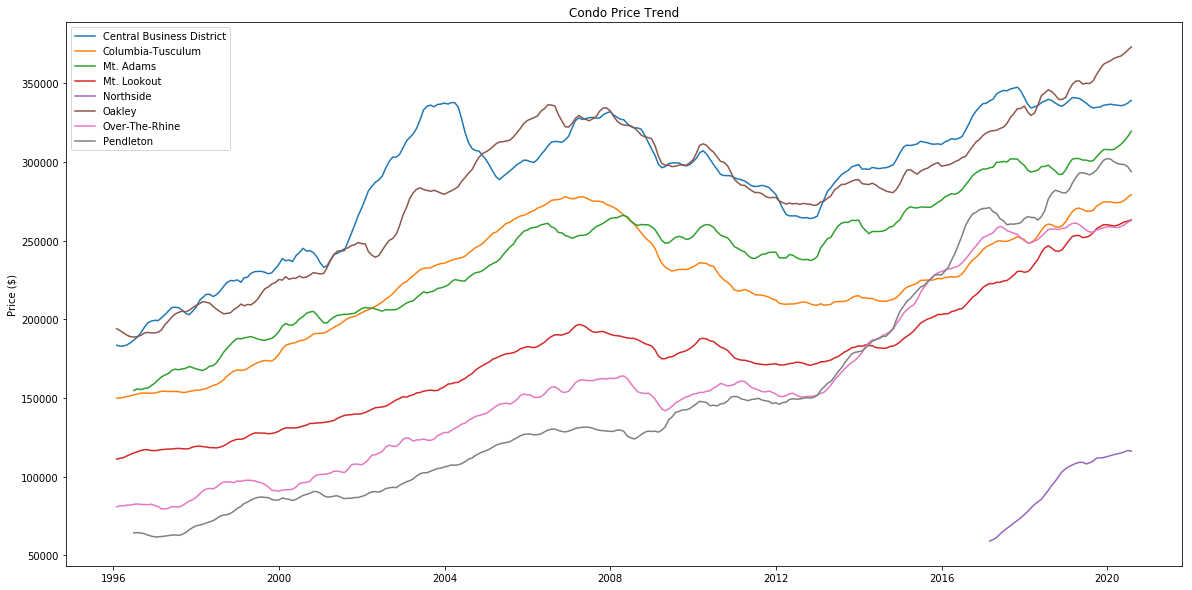

In [46]:
plt.figure(figsize=[20,10])

for n in condo_time.columns[1:9]:
    plt.plot(condo_time['Time'], condo_time[n], label=n)
    
plt.legend(loc='upper left')
plt.title('Condo Price Trend')
plt.ylabel('Price ($)')
plt.show()

The graph shows similar trend for house price in all neighborhoods. There was an increasing trend from 1996 to 2008, followed by a decline until 2012. Then, after 2012, there is an increasing in house price up until today. Out of all neighborhoods, Pendleton has the highest increase, while Central Business District has the lowest increase. The data for Northside started in 2017, suggesting that condo was only availabe after 2017. 

Let's perform the same analysis on single family house.

In [47]:
sfh.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31
355,204284,366,Westwood,Neighborhood,OH,OH,Cincinnati,Cincinnati,Hamilton County,88864.0,...,112246.0,113435.0,114342.0,115188.0,115926.0,117003.0,118480.0,120191.0,122299.0,124126.0
727,275981,759,West Price HIll,Neighborhood,OH,OH,Cincinnati,Cincinnati,Hamilton County,79293.0,...,94124.0,95550.0,96965.0,98051.0,99017.0,100064.0,101204.0,102232.0,103527.0,105002.0
806,273417,839,CUF,Neighborhood,OH,OH,Cincinnati,Cincinnati,Hamilton County,68944.0,...,165752.0,166978.0,167933.0,168773.0,169838.0,171172.0,172947.0,174711.0,176869.0,178726.0
956,201414,995,Hyde Park,Neighborhood,OH,OH,Cincinnati,Cincinnati,Hamilton County,225909.0,...,546189.0,548102.0,548268.0,548694.0,549415.0,551760.0,554385.0,558001.0,561841.0,565625.0
1107,200100,1147,College Hill,Neighborhood,OH,OH,Cincinnati,Cincinnati,Hamilton County,95216.0,...,134879.0,135940.0,136644.0,137483.0,138348.0,139472.0,141007.0,142611.0,144017.0,145063.0


In [48]:
# Remove unnecessary columns
sfh.drop(['RegionID','SizeRank','RegionType','StateName','State','City', 'Metro','CountyName'],axis=1, inplace=True)
sfh.head()

,RegionName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,...,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31
355,Westwood,88864.0,88910.0,88914.0,89086.0,89295.0,89723.0,90129.0,90542.0,90761.0,...,112246.0,113435.0,114342.0,115188.0,115926.0,117003.0,118480.0,120191.0,122299.0,124126.0
727,West Price HIll,79293.0,79600.0,79651.0,79966.0,80194.0,80626.0,80872.0,81093.0,81222.0,...,94124.0,95550.0,96965.0,98051.0,99017.0,100064.0,101204.0,102232.0,103527.0,105002.0
806,CUF,68944.0,69325.0,69437.0,69654.0,69931.0,70625.0,71355.0,71730.0,71684.0,...,165752.0,166978.0,167933.0,168773.0,169838.0,171172.0,172947.0,174711.0,176869.0,178726.0
956,Hyde Park,225909.0,225272.0,223836.0,221108.0,218618.0,217114.0,216359.0,216148.0,216396.0,...,546189.0,548102.0,548268.0,548694.0,549415.0,551760.0,554385.0,558001.0,561841.0,565625.0
1107,College Hill,95216.0,94903.0,94683.0,94288.0,94243.0,94352.0,94632.0,94883.0,95234.0,...,134879.0,135940.0,136644.0,137483.0,138348.0,139472.0,141007.0,142611.0,144017.0,145063.0


In [49]:
sfh.set_index('RegionName',inplace=True)
sfh.index.name = None
sfh.head()

,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,...,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31
Westwood,88864.0,88910.0,88914.0,89086.0,89295.0,89723.0,90129.0,90542.0,90761.0,90944.0,...,112246.0,113435.0,114342.0,115188.0,115926.0,117003.0,118480.0,120191.0,122299.0,124126.0
West Price HIll,79293.0,79600.0,79651.0,79966.0,80194.0,80626.0,80872.0,81093.0,81222.0,81471.0,...,94124.0,95550.0,96965.0,98051.0,99017.0,100064.0,101204.0,102232.0,103527.0,105002.0
CUF,68944.0,69325.0,69437.0,69654.0,69931.0,70625.0,71355.0,71730.0,71684.0,71438.0,...,165752.0,166978.0,167933.0,168773.0,169838.0,171172.0,172947.0,174711.0,176869.0,178726.0
Hyde Park,225909.0,225272.0,223836.0,221108.0,218618.0,217114.0,216359.0,216148.0,216396.0,216683.0,...,546189.0,548102.0,548268.0,548694.0,549415.0,551760.0,554385.0,558001.0,561841.0,565625.0
College Hill,95216.0,94903.0,94683.0,94288.0,94243.0,94352.0,94632.0,94883.0,95234.0,95402.0,...,134879.0,135940.0,136644.0,137483.0,138348.0,139472.0,141007.0,142611.0,144017.0,145063.0


In [50]:
sfh_interest = neighborhoods.join(sfh, on='Neighborhood')
sfh_interest.set_index('Neighborhood',inplace=True)
sfh_interest.index.name = None
sfh_interest

,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,...,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31
Central Business District,115811.0,115455.0,114876.0,113258.0,112771.0,112631.0,113743.0,113984.0,114200.0,113317.0,...,277832.0,280121.0,280659.0,279942.0,279666.0,281274.0,282774.0,285585.0,288421.0,288355.0
Columbia-Tusculum,199188.0,198815.0,197432.0,195467.0,193891.0,192367.0,190879.0,188627.0,187592.0,186271.0,...,428882.0,429363.0,429369.0,429507.0,429923.0,431774.0,433813.0,437075.0,439627.0,442171.0
Mt. Adams,240298.0,238417.0,237256.0,234462.0,233884.0,234995.0,235668.0,235320.0,236324.0,240814.0,...,604339.0,607335.0,607092.0,607040.0,605834.0,606043.0,606573.0,609715.0,613281.0,615726.0
Mt. Lookout,217773.0,217400.0,217197.0,217621.0,219398.0,221536.0,222665.0,222879.0,223249.0,223617.0,...,540388.0,542255.0,543114.0,544035.0,544939.0,547285.0,549440.0,552357.0,554824.0,557214.0
Northside,54716.0,55066.0,55312.0,56018.0,56509.0,56982.0,57629.0,58243.0,58977.0,59247.0,...,160258.0,161612.0,163464.0,164637.0,165123.0,165361.0,166440.0,168862.0,172088.0,174360.0
Oakley,98739.0,99349.0,99913.0,101367.0,102377.0,103104.0,103151.0,103191.0,103121.0,103063.0,...,282802.0,283939.0,284793.0,285317.0,286240.0,287640.0,289619.0,292017.0,294797.0,297939.0
Over-The-Rhine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,305361.0,308210.0,309608.0,309414.0,308846.0,309251.0,310102.0,311287.0,313335.0,315073.0
Pendleton,NaN,NaN,NaN,NaN,169523.0,172812.0,175687.0,180605.0,183483.0,185871.0,...,398737.0,402334.0,402930.0,403495.0,401525.0,398828.0,397239.0,397330.0,400218.0,402278.0


In [51]:
sfh_time = sfh_interest.transpose()
sfh_time.head()

,Central Business District,Columbia-Tusculum,Mt. Adams,Mt. Lookout,Northside,Oakley,Over-The-Rhine,Pendleton
1996-01-31,115811.0,199188.0,240298.0,217773.0,54716.0,98739.0,NaN,NaN
1996-02-29,115455.0,198815.0,238417.0,217400.0,55066.0,99349.0,NaN,NaN
1996-03-31,114876.0,197432.0,237256.0,217197.0,55312.0,99913.0,NaN,NaN
1996-04-30,113258.0,195467.0,234462.0,217621.0,56018.0,101367.0,NaN,NaN
1996-05-31,112771.0,193891.0,233884.0,219398.0,56509.0,102377.0,NaN,169523.0


In [52]:
sfh_time.reset_index(inplace=True)
sfh_time.rename(columns={"index" : "Time"}, inplace=True)

In [53]:
sfh_time['Time']=pd.to_datetime(sfh_time['Time'])

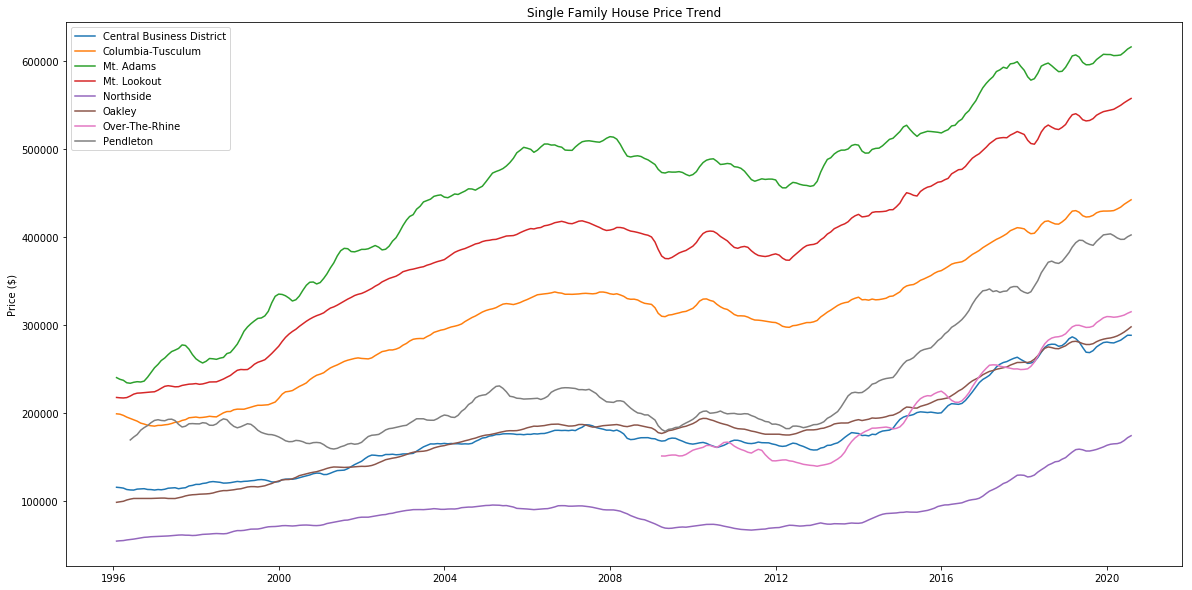

In [54]:
plt.figure(figsize=[20,10])

for n in sfh_time.columns[1:9]:
    plt.plot(sfh_time['Time'], sfh_time[n], label=n)
    

plt.legend(loc='upper left')
plt.title('Single Family House Price Trend')
plt.ylabel('Price ($)')
plt.show()

Similar to the trend for condos, the housing price trend for single family house in all neighborhoods is very similar. There was an increasing trend from 1996 to 2008, followed by a slight decline/plateau from 2008 to 2012. After 2012, there is an increasing trend up until today. Out of all neighborhoods, Pendleton has the highest increase. 

Now let's compare the different housing options in each neighborhood to determine whether a condo or a single family house would be a better investment option.

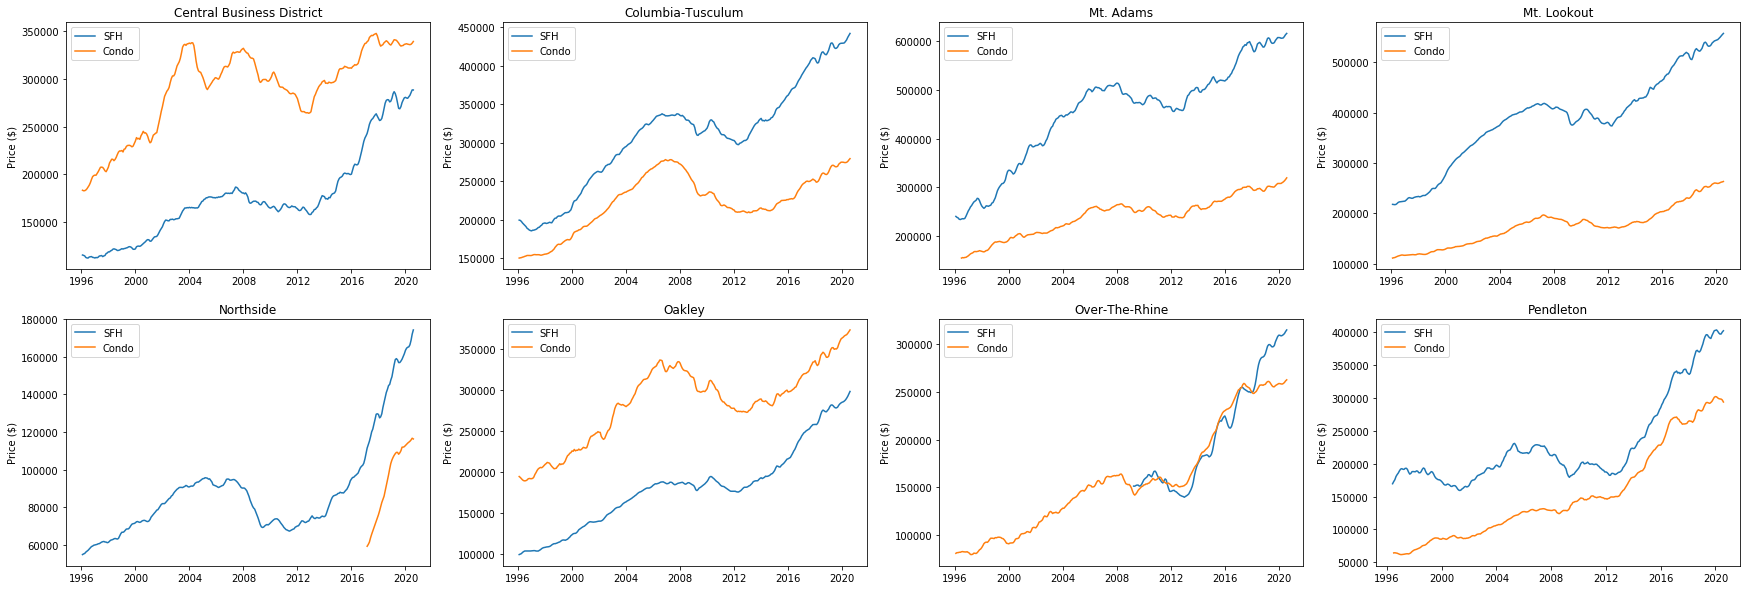

In [55]:
plt.figure(figsize=[30,10])
i=1
for n,m in zip(sfh_time.columns[1:9],condo_time.columns[1:9]):
    plt.subplot(2,4,i)
    plt.plot(sfh_time['Time'], sfh_time[n], label='SFH')
    plt.plot(condo_time['Time'], condo_time[m], label='Condo')
    plt.legend(loc='upper left')
    plt.ylabel('Price ($)')
    plt.title(n)
    i=i+1

plt.show()

From the graph, we can make several observations:
* Price comparison
    * neighborhoods where price for condo is always higher than price for SFH: Central Business District, Oakley
    * neighborhood where price for condo is similar to price for SFH: Over-The-Rhine
    * neighborhoods where price for condo is always lower than price for SFH:Columbia-Tusculum, Mt.Adams, Mt.Lookout, Northside, Pendleton
* Trend comparison
    * there is no neighborhood where the rate of increase in condo price is higher 
    * neighborhoods where the rate of increase in condo price is lower: Central Business District, Columbia-Tusculum, Mt.Adams, Mt.Lookout, Pendleton
    * neighborhoods where the rate of increase is similar for both housing options:Northside, Oakley, Over-The-Rhine

In conclusion, single family house is always a better option in terms of growth potential, regardless of the neighborhood. In choosing the final neighborhood, the client might need to consider other factors such as commute time, budget for housing, etc. This report will serve as a first step in helping the client narrow down house search options.